### Previously reported dependency parsing performances for Estonian and English

Sources:

* Stanford @ CoNLL 2017 Shared Task: https://universaldependencies.org/conll17/results-las.html
* HIT-SCIR, StanfordNLP & UDPipe 1.2 @ CoNLL 2018 Shared Task: https://universaldependencies.org/conll18/results-las.html
* Stanza version 1.0: https://stanfordnlp.github.io/stanza/v100performance.html
* Stanza version 1.3: https://stanfordnlp.github.io/stanza/performance.html 
* UDPipe 2: https://ufal.mff.cuni.cz/udpipe/2/models 
* Udify: https://arxiv.org/pdf/1904.02099.pdf
* RobertNLP @ IWPT 2021 Shared Task: https://universaldependencies.org/iwpt21/results_official_fine.html ; https://aclanthology.org/2021.iwpt-1.21.pdf

* Corpus sizes:
    * Estonian:
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.0/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.2/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.5/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.7/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EWT/blob/r2.7/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.8/stats.xml
        * https://github.com/UniversalDependencies/UD_Estonian-EDT/blob/r2.10/stats.xml
    * English:
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.0/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.2/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.5/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.7/stats.xml
        * https://github.com/UniversalDependencies/UD_English-GUM/blob/r2.7/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.6/stats.xml
        * https://github.com/UniversalDependencies/UD_English-EWT/blob/r2.10/stats.xml

(last checked: 2023-06-14)

In [1]:
#!pip install adjustText

In [2]:
from plotnine import ggplot, geom_point, aes, geom_line, geom_text
from plotnine import geom_abline, geom_hline, ggtitle, theme, xlab, labs
from plotnine import scale_color_manual, element_line, element_text, theme_bw
import pandas as pd

In [3]:
data = {
'ud_version':    [2.0, 2.2, 2.2, 2.5, 2.8, 2.2, 2.2, 2.10, 2.3, 2.7]+\
                 [2.0, 2.2, 2.2, 2.5, 2.8, 2.2, 2.2, 2.10, 2.3, 2.7],
# total corpus size
'corpus_size':   [ 34, 366, 366, 437, 437, 366, 366, 437, 12032, 437+56]+\
                 [229, 254, 254, 254, 254, 254, 254, 254, 12032, 254+113], 
'LAS': [71.65, 85.35, 83.84, 83.82, 84.43, 75.02, 83.26, 86.16, 86.67, 89.52]+\
       [82.23, 84.57, 83.87, 83.59, 84.91, 77.56, 82.51, 88.10, 88.50, 90.27],
'parser': ['Stanford', 'HIT-SCIR', 'StanfordNLP', 'Stanza v1.0', 'Stanza v1.3', 'UDPipe 1.2', 'UDPipe 2 prototype', 'UDPipe 2', 'Udify v1.0', 'RobertNLP']+\
          ['Stanford', 'HIT-SCIR', 'StanfordNLP', 'Stanza v1.0', 'Stanza v1.3', 'UDPipe 1.2', 'UDPipe 2 prototype', 'UDPipe 2', 'Udify v1.0', 'RobertNLP'],
# corpus name
'corpus': ['et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt', 'et_edt']+\
          ['en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt', 'en_ewt'],
'year':   [2017, 2018, 2018, 2020, 2021, 2018, 2018, 2022, 2019, 2021]+\
          [2017, 2018, 2018, 2020, 2021, 2018, 2018, 2022, 2019, 2021],
}
results = pd.DataFrame.from_dict(data)
results

,ud_version,corpus_size,LAS,parser,corpus,year
0,2.0,34,71.65,Stanford,et_edt,2017
1,2.2,366,85.35,HIT-SCIR,et_edt,2018
2,2.2,366,83.84,StanfordNLP,et_edt,2018
3,2.5,437,83.82,Stanza v1.0,et_edt,2020
4,2.8,437,84.43,Stanza v1.3,et_edt,2021
5,2.2,366,75.02,UDPipe 1.2,et_edt,2018
6,2.2,366,83.26,UDPipe 2 prototype,et_edt,2018
7,2.1,437,86.16,UDPipe 2,et_edt,2022
8,2.3,12032,86.67,Udify v1.0,et_edt,2019
9,2.7,493,89.52,RobertNLP,et_edt,2021


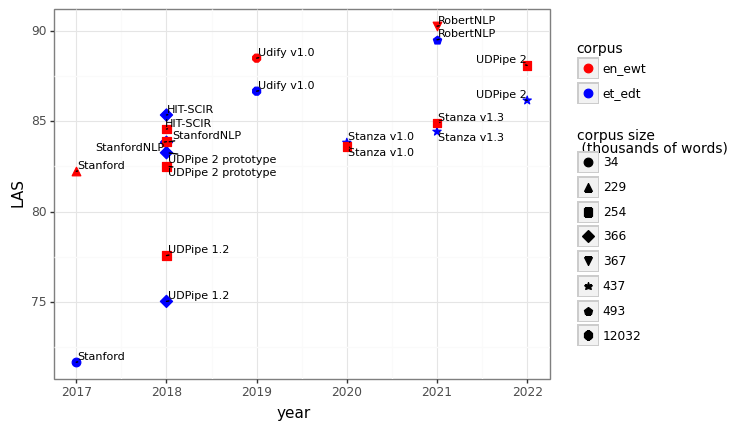

<ggplot: (165138906917)>

In [4]:
p = ggplot(results) + theme_bw()
p = p + theme(legend_title=element_text(size=10))
p = p + geom_point(aes(x='year', y='LAS', color='corpus', shape='factor(corpus_size)'),
                   show_legend={'size': False}, size=3)
p = p + geom_text(aes(x='year', y='LAS', label="parser"), data=results, size=8, 
                  adjust_text={'arrowprops': {'arrowstyle': '-'}} )
# Override default colors
p = p + scale_color_manual(values = {'et_edt': 'blue', 'en_ewt': 'red'})
# Override labels
p = p +  labs(shape = "corpus size\n (thousands of words)")
#p = p + theme(legend_position='top')
display(p)

In [5]:
p.save('figure_reported_las_vs_years.pdf')

C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:718: PlotnineWarning: Saving 6.4 x 4.8 in image.
C:\Programmid\Miniconda3\envs\py38_estnltk_neural\lib\site-packages\plotnine\ggplot.py:719: PlotnineWarning: Filename: figure_reported_las_vs_years.pdf
